<a href="https://colab.research.google.com/github/NellyLuo/tensorflow_study/blob/master/exercise/tensorflow_study_mnist_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

m1 = tf.constant([3, 5])
m2 = tf.constant([1, 2])

result = tf.add(m1, m2)

sess = tf.Session()
print(sess.run(result))
sess.close()

In [0]:
import tensorflow as tf
from tensorflow import keras

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 15s 242us/step - loss: 0.2016 - acc: 0.9409
Epoch 2/5
60000/60000 [==============================] - 14s 233us/step - loss: 0.0806 - acc: 0.9748
Epoch 3/5
60000/60000 [==============================] - 13s 223us/step - loss: 0.0526 - acc: 0.9839
Epoch 4/5
60000/60000 [==============================] - 13s 225us/step - loss: 0.0368 - acc: 0.9886
Epoch 5/5
10000/10000 [==============================] - 1s 52us/step
Test accuracy: 0.9812


Extracting ../mnist_link/train-images-idx3-ubyte.gz
Extracting ../mnist_link/train-labels-idx1-ubyte.gz
Extracting ../mnist_link/t10k-images-idx3-ubyte.gz
Extracting ../mnist_link/t10k-labels-idx1-ubyte.gz
Accuracy rate is 0.9102


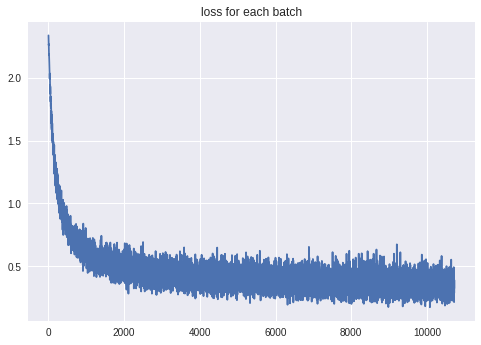

In [11]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

MNIST = input_data.read_data_sets('../mnist_link', one_hot = True)

learning_rate = 0.01
# eopch指的使用全部数据集进行一次训练。进行训练时一个epoch可能更新了若干次参数。
# epoch_num 为指定的epoch次数，整个训练集训练几轮。
epoch_num = 25
batch_size = 128

# tf.placeholder(dtype, shape=None, name=None)
X = tf.placeholder(tf.float32, [batch_size, 784], name= 'input')
Y = tf.placeholder(tf.float32, [batch_size, 10], name= 'label')
# tf.Variable(name=None, initial_value, validate_shape=True, trainable=True,
#             collections=None)
w = tf.Variable(tf.random_normal(shape = [784, 10], stddev = 0.01),
                name= 'weights')
b = tf.Variable(tf.zeros([1,10]), name = 'bias')

# 下面这个是目标函数，matmul,矩阵点乘
logits = tf.matmul(X, w) + b
# 求交叉熵
# tf.nn.softmax_cross_entropy_with_logits(
#     _sentinel=None, labels=None, logits=None, dim=-1, name=None)
# _sentinel: 这个参数一般情况不使用,直接设置为None就好
# logits: 一个没有缩放的对数张量。labels和logits具有相同的type和shape
# labels: 每一行 labels[i] 必须是一个有效的概率分布值。
# name: 为这个操作取个名字。
entropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
# tf.reduce_mean(input_tensor, axis=None, keep_dims=False, 
#                name=None, reduction_indices=None)
# 求指定维度平均值，axis指定维度
loss = tf.reduce_mean(entropy)

# 优化方法
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

# 初始化模型的参数
init = tf.global_variables_initializer()
loss_array = []
with tf.Session() as sess:
  sess.run(init)
#   train
  batch_num = int(MNIST.train.num_examples/batch_size)
#   在设定的轮次中
  for _ in range(epoch_num):
#     在设定的batch次数中
    for _ in range(batch_num):
      X_batch, Y_batch = MNIST.train.next_batch(batch_size)
      _, v = sess.run([optimizer, loss], {X: X_batch, Y:Y_batch})
      loss_array.append(v)
  
#   test
  total_correct_preds = 0
  batch_num = int(MNIST.test.num_examples/batch_size)
  for i in range(batch_num):
    X_batch, Y_batch = MNIST.test.next_batch(batch_size)
    _, loss_batch, logits_batch = sess.run(
        [optimizer, loss, logits],{X:X_batch, Y:Y_batch})
    
    preds = tf.nn.softmax(logits_batch)
    correct_preds = tf.equal(tf.argmax(preds,1),tf.argmax(Y_batch,1))
    accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
    total_correct_preds += sess.run(accuracy)
  
  print("Accuracy rate is {}".format(total_correct_preds/MNIST.test.num_examples))

x_axis = range(len(loss_array))
plt.plot(x_axis, loss_array)
plt.title('loss for each batch')
plt.show()    
